Dataset Availability:
https://www.kaggle.com/datasets/bedooralmareni/players-22csv

Dataset Description:
The dataset contains detailed information about FIFA 22 players, including their attributes such as shooting, passing, dribbling, defense, physicality, and more. Additionally, it includes the players' overall rating, age, position, club, nationality, and other relevant data points.

Problem to Solve:
We aim to predict a player's overall rating based on their individual attributes using supervised machine learning. The challenge is to build an accurate predictive model using player attributes to estimate their overall rating. We specifically use a Random Forest model, which is a powerful ensemble learning technique, to make these predictions. The goal is to both: 1. Create a predictive model that can accurately guess the overall rating of players based on their attributes. 2.Analyze feature importance to understand which player attributes contribute most to the overall rating, providing insights into the key factors that influence FIFA player rankings.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

fifa_data = pd.read_csv('data/players_22.csv')
fifa_data.head(10)

/var/folders/js/ds2_j3sj7754dblxlj1pgb_h0000gr/T/ipykernel_61008/3108240485.py:10: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_data = pd.read_csv('data/players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


Here we choose all the attributes from the dataset that we want to use in our model. We then define position groups and filter the players into said groups

In [15]:
model_columns = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 
    'mentality_vision', 'mentality_penalties', 'mentality_composure', 
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    # goalie
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

position_groups = {
    'Forwards': ['ST', 'LW', 'RW', 'LM', 'RM', 'CF'],
    'Midfielders': ['CAM', 'CM', 'CDM'],
    'Defenders': ['CB', 'LB', 'RB', 'RWB', 'LWB'],
    'Goalkeepers': ['GK']
}

position_data = {}
for group, positions in position_groups.items():
    position_data[group] = fifa_data[fifa_data['player_positions'].str.split(',').str[0].isin(positions)]


Mean Absolute Error: 2.23


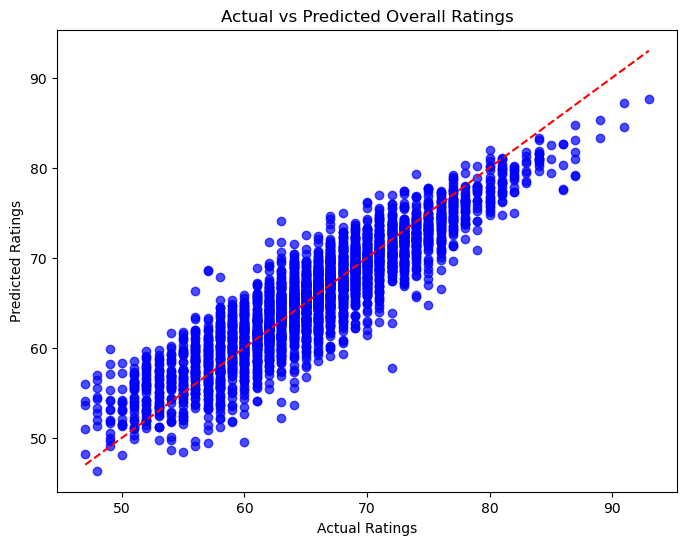

                             Coefficient
attacking_crossing              0.069866
attacking_finishing             0.004047
attacking_heading_accuracy     -0.024677
attacking_short_passing         0.055228
attacking_volleys              -0.023194
skill_dribbling                -0.011916
skill_curve                    -0.000372
skill_fk_accuracy              -0.010928
skill_long_passing             -0.016925
skill_ball_control              0.065860
movement_acceleration           0.017065
movement_sprint_speed           0.009946
movement_agility                0.002421
movement_reactions              0.490049
movement_balance               -0.038619
power_shot_power                0.126755
power_jumping                   0.021738
power_stamina                   0.005007
power_strength                  0.040226
power_long_shots               -0.061157
mentality_aggression           -0.019828
mentality_interceptions        -0.014390
mentality_positioning          -0.083917
mentality_vision

In [16]:
#Linear regression model 

features = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 
    'mentality_vision', 'mentality_penalties', 'mentality_composure', 
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
target = 'overall'

#Filter out rows with missing values in relevant columns
fifa_data_clean = fifa_data[features + [target]].dropna()


X = fifa_data_clean[features]  
y = fifa_data_clean[target]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot the predicted vs actual overall ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Overall Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Check the coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

As we can see in the mean error of 2.22, the linear regression model is accurate. 


Next we train, evaluate, and track the performance of our random forest models

In [22]:
position_models = {}
position_scores = {}

for position, data in position_data.items():
    X = data[model_columns]
    y = data['overall']
    X = X.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    position_scores[position] = mae
    position_models[position] = rf_model

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    

Graph to show the distribution and range of players overall ratings

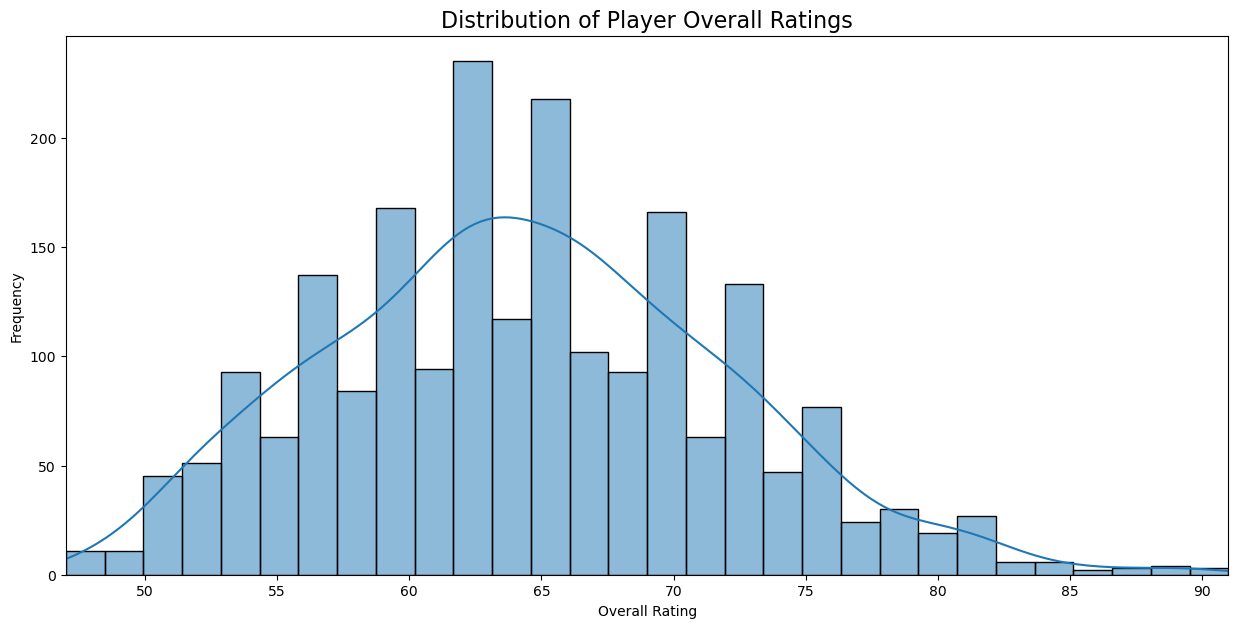

Minimum overall rating: 47
Maximum overall rating: 91


In [24]:
plt.figure(figsize=(15, 7))
sns.histplot(y, kde=True, bins=30)  
plt.title('Distribution of Player Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.xlim(y.min(), y.max())  
plt.show()

print(f"Minimum overall rating: {y.min()}")
print(f"Maximum overall rating: {y.max()}")

Next we have some visualization to show the top 10 players in certain attributes

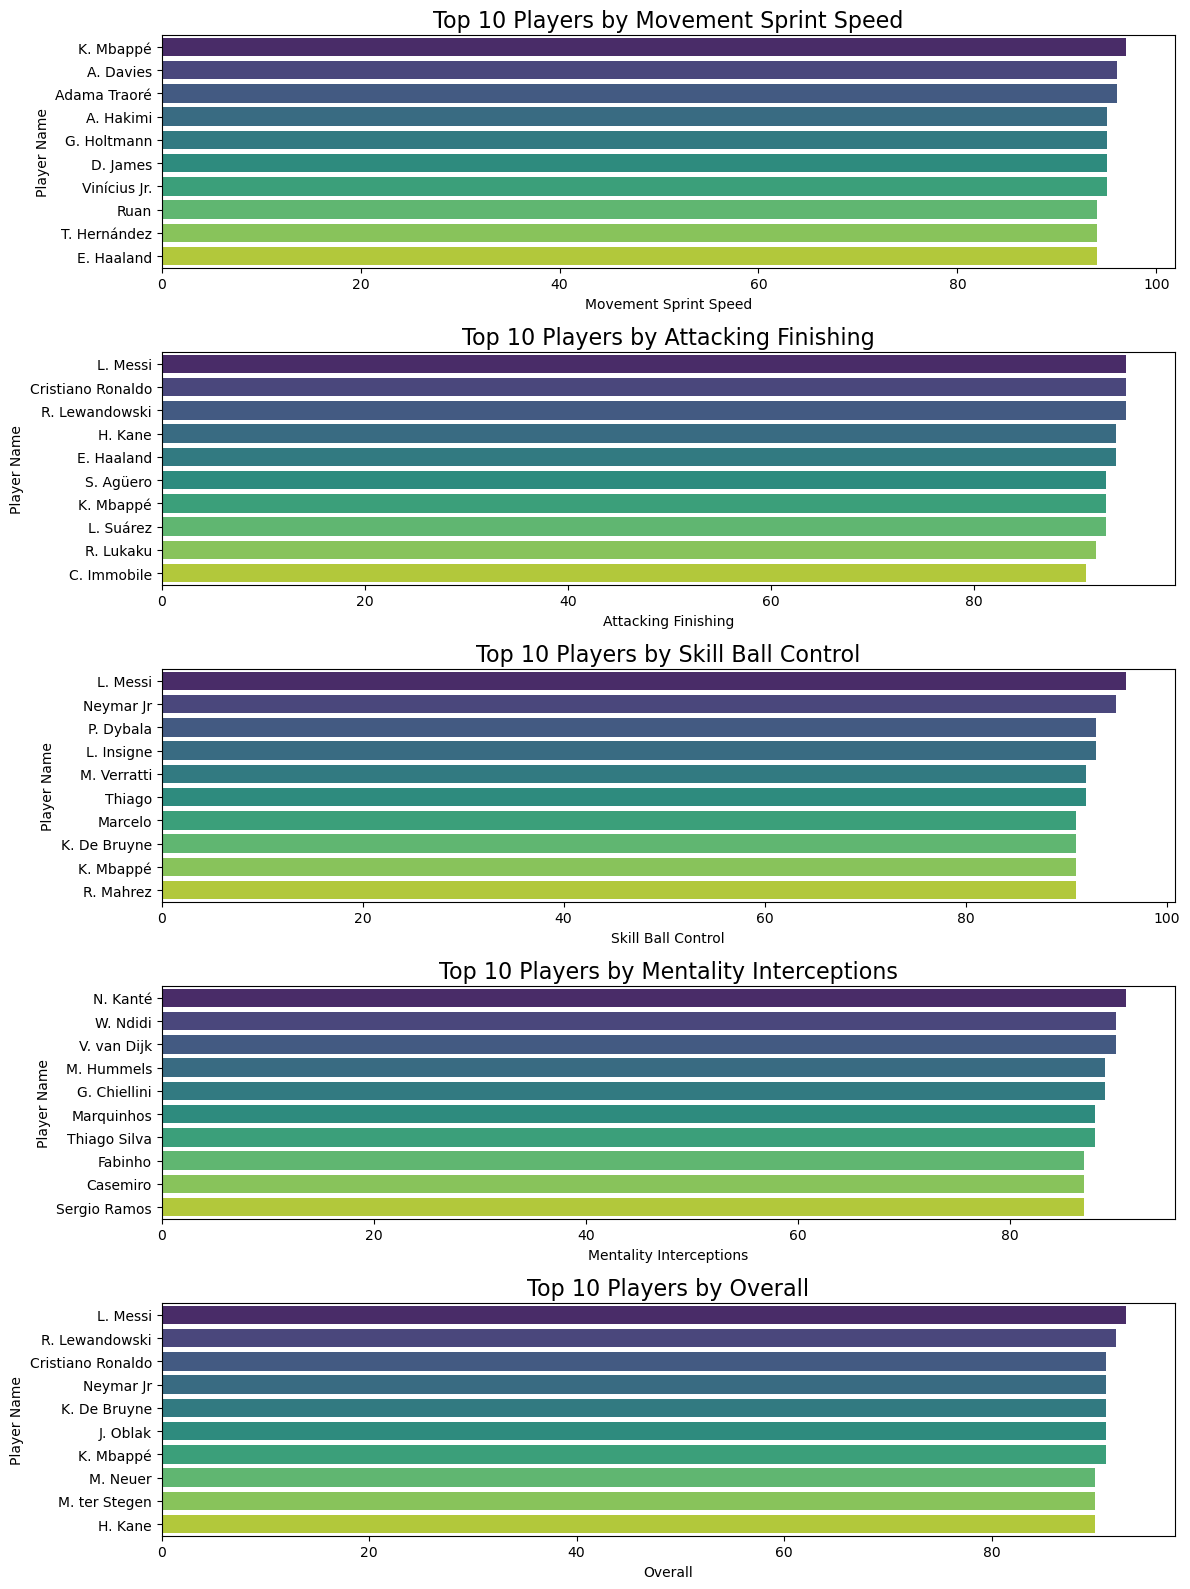

In [26]:
attributes_to_plot = ['movement_sprint_speed', 'attacking_finishing', 'skill_ball_control', 'mentality_interceptions','overall']

plt.figure(figsize=(12, 16))
for i, attribute in enumerate(attributes_to_plot, 1):
    top_players = fifa_data[['short_name', attribute]].sort_values(by=attribute, ascending=False).head(10)
    
    plt.subplot(5, 1, i)
    sns.barplot(x=attribute, y='short_name', data=top_players, hue='short_name', palette='viridis', legend=False)
    plt.title(f'Top 10 Players by {attribute.replace("_", " ").title()}', fontsize=16)
    plt.xlabel(attribute.replace("_", " ").title())
    plt.ylabel('Player Name')
    plt.tight_layout()

plt.show()

Here we create graphs that show the distribution of each attribute.

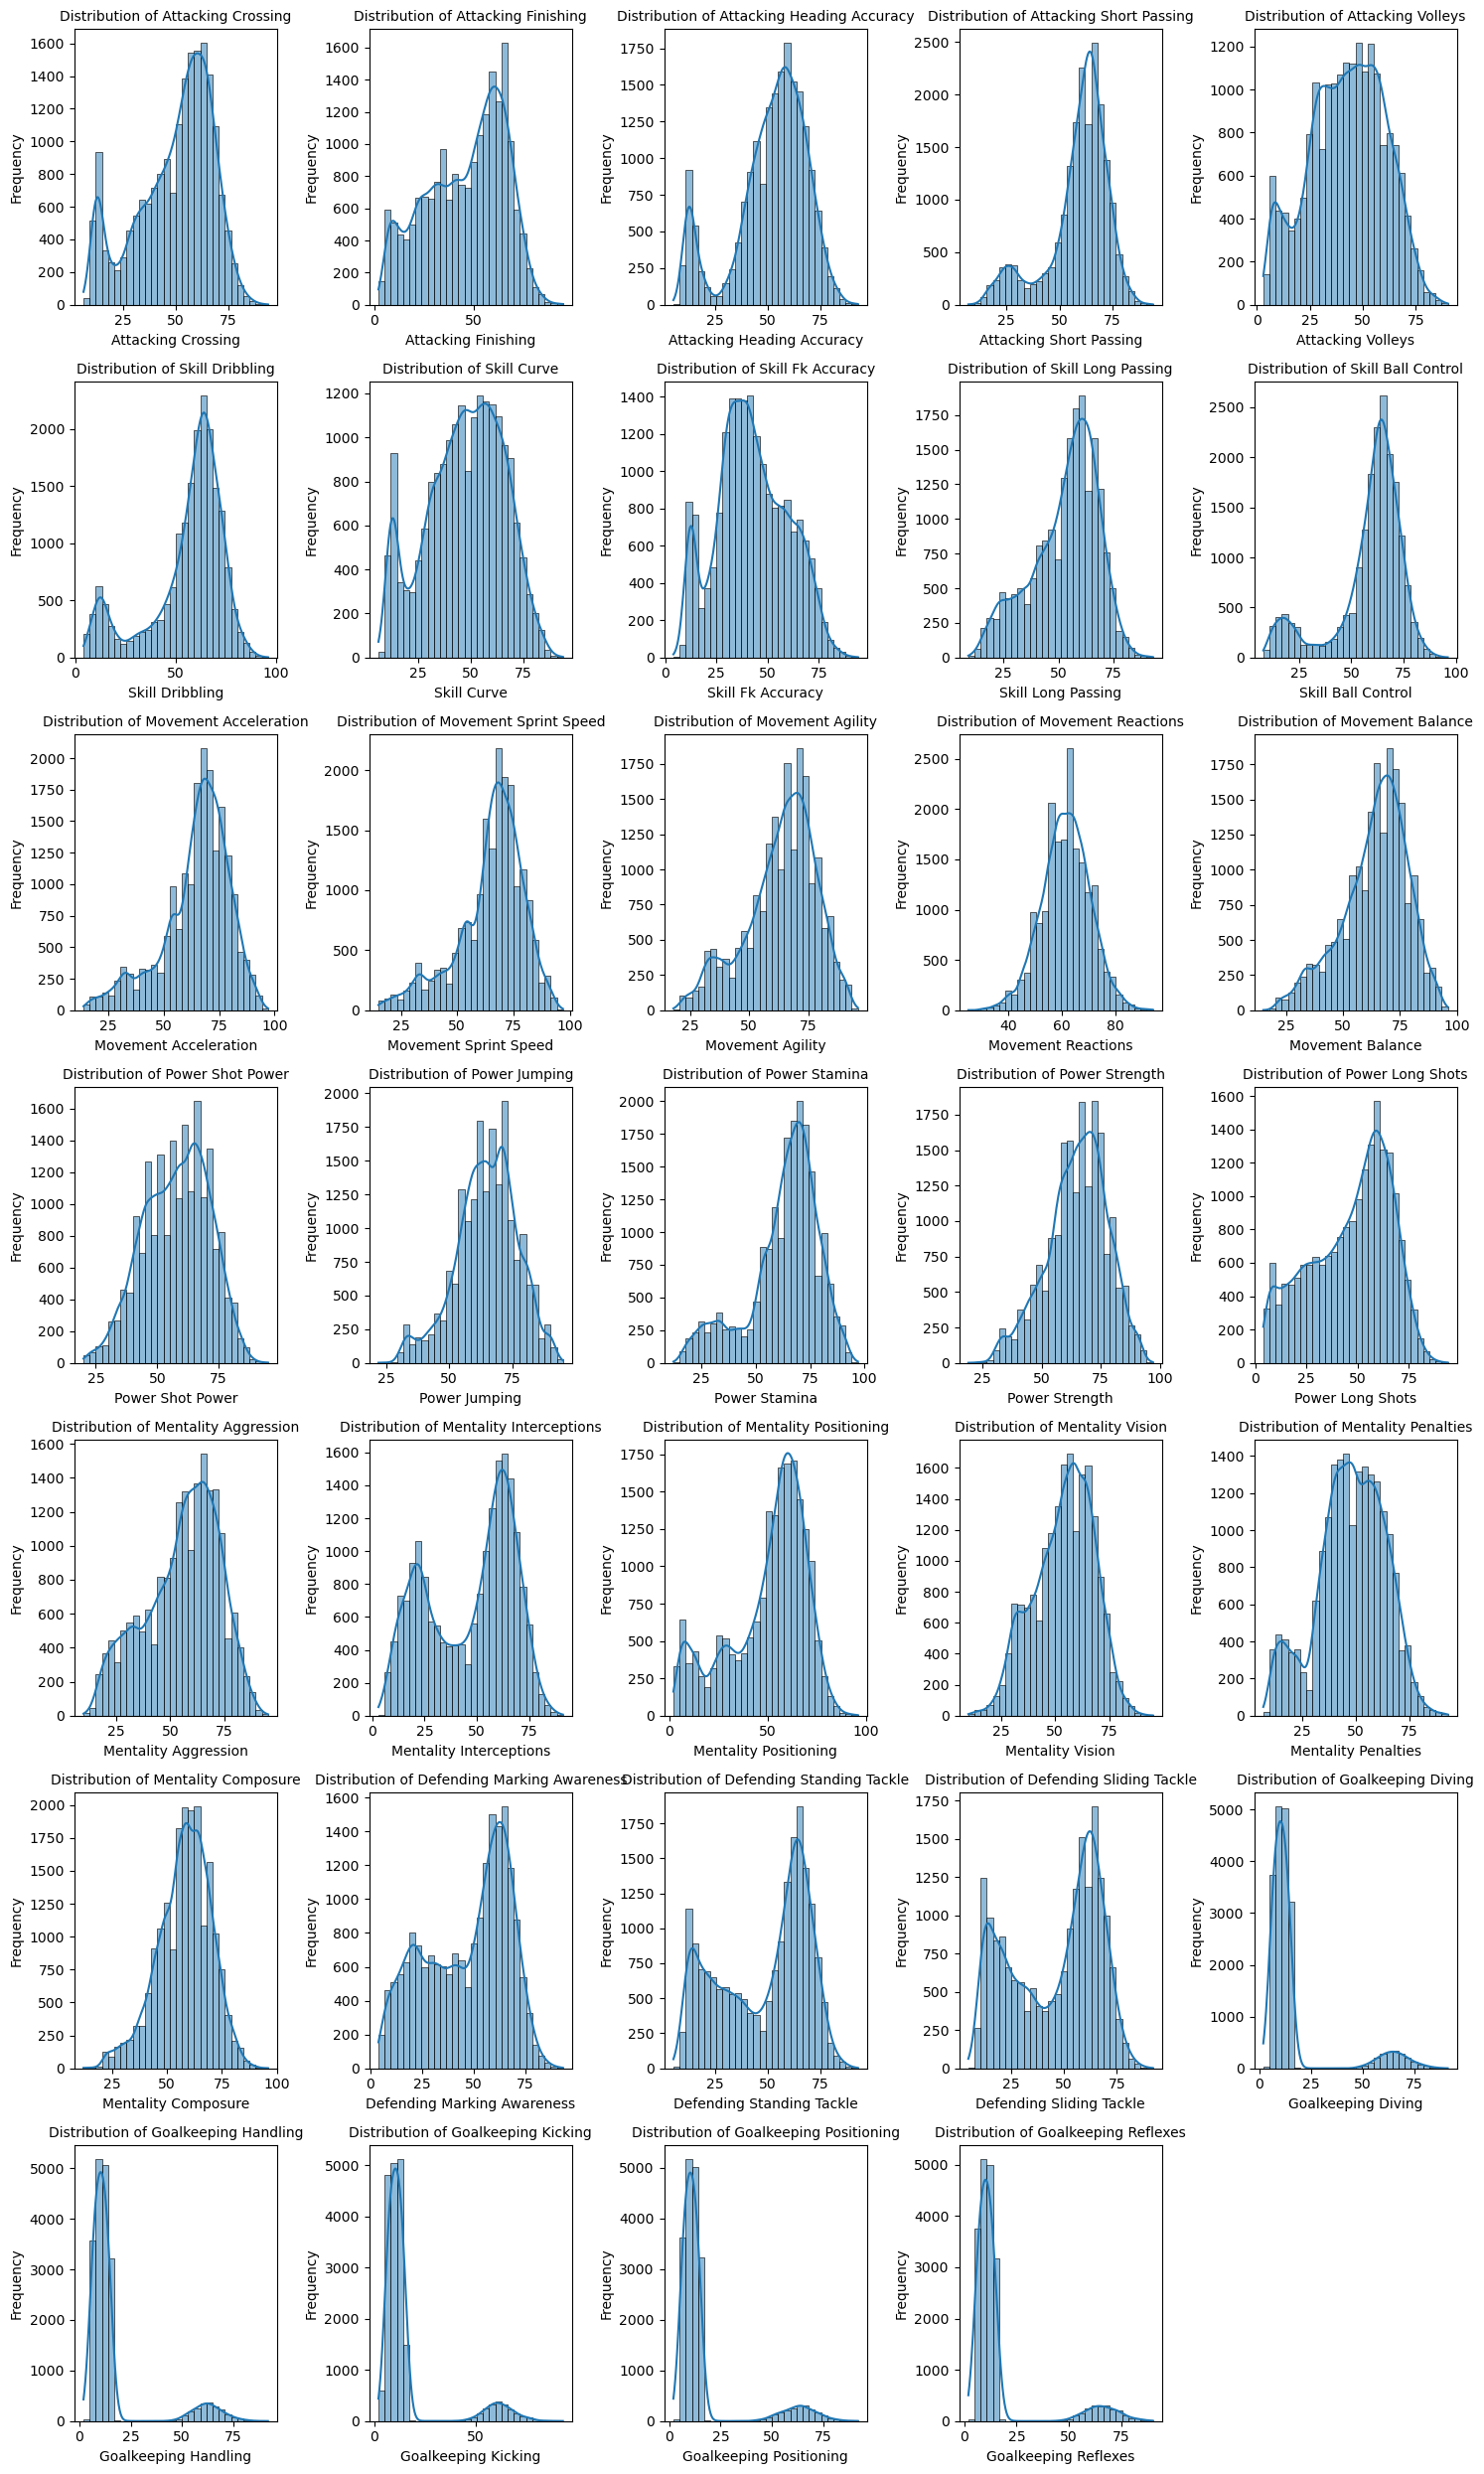

In [28]:
plt.figure(figsize=(15, 25)) 

for i, attribute in enumerate(model_columns, 1):
    plt.subplot(7, 5, i) 
    sns.histplot(fifa_data[attribute], kde=True, bins=30)
    plt.title(f'Distribution of {attribute.replace("_", " ").title()}', fontsize=10)
    plt.xlabel(attribute.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Feature Importance for Forwards:
                    feature  importance
9        skill_ball_control    0.751359
22    mentality_positioning    0.093929
13       movement_reactions    0.055081
5           skill_dribbling    0.012706
1       attacking_finishing    0.012399
3   attacking_short_passing    0.011161
0        attacking_crossing    0.009643
15         power_shot_power    0.007326
11    movement_sprint_speed    0.006240
17            power_stamina    0.005678


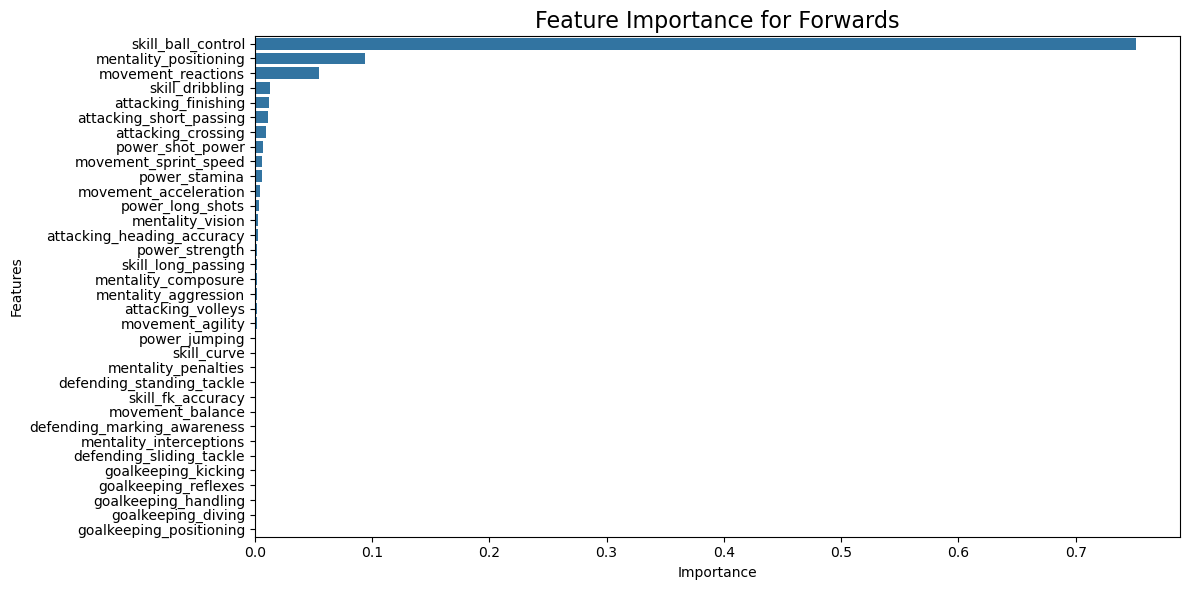

Mean Absolute Error for Forwards players: 0.87

Feature Importance for Midfielders:
                        feature  importance
13           movement_reactions    0.444830
3       attacking_short_passing    0.345075
9            skill_ball_control    0.089830
21      mentality_interceptions    0.026622
27    defending_standing_tackle    0.013991
26  defending_marking_awareness    0.010113
23             mentality_vision    0.008741
5               skill_dribbling    0.006666
19             power_long_shots    0.005398
22        mentality_positioning    0.005271


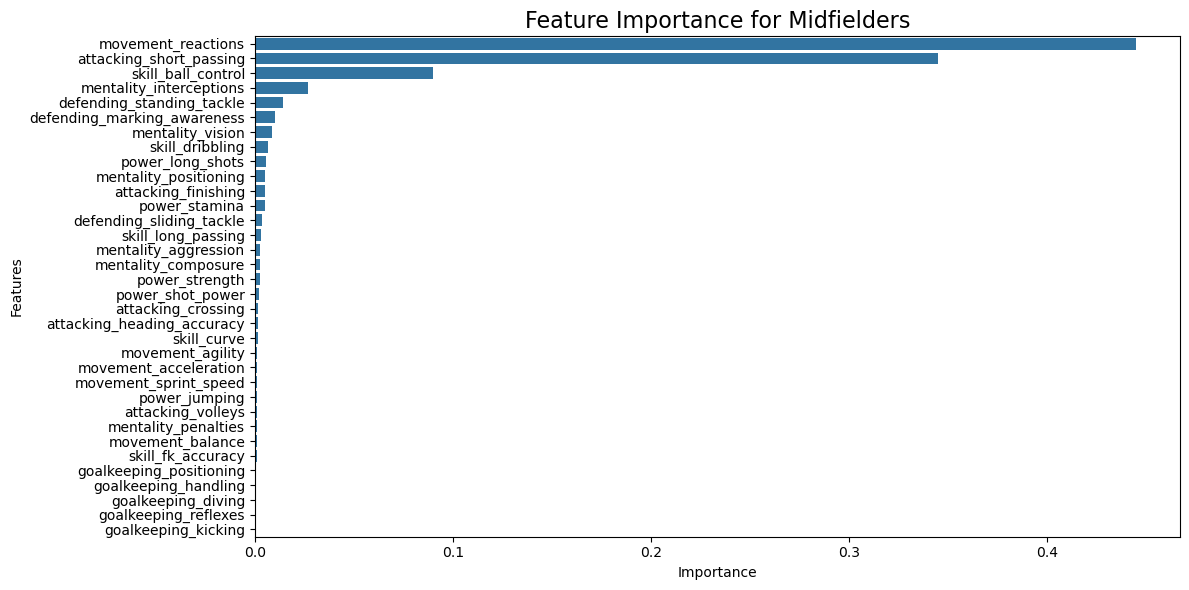

Mean Absolute Error for Midfielders players: 0.87

Feature Importance for Defenders:
                        feature  importance
21      mentality_interceptions    0.456181
13           movement_reactions    0.218308
28     defending_sliding_tackle    0.122141
9            skill_ball_control    0.051345
27    defending_standing_tackle    0.036686
26  defending_marking_awareness    0.020417
3       attacking_short_passing    0.019456
0            attacking_crossing    0.012732
17                power_stamina    0.011526
25          mentality_composure    0.006614


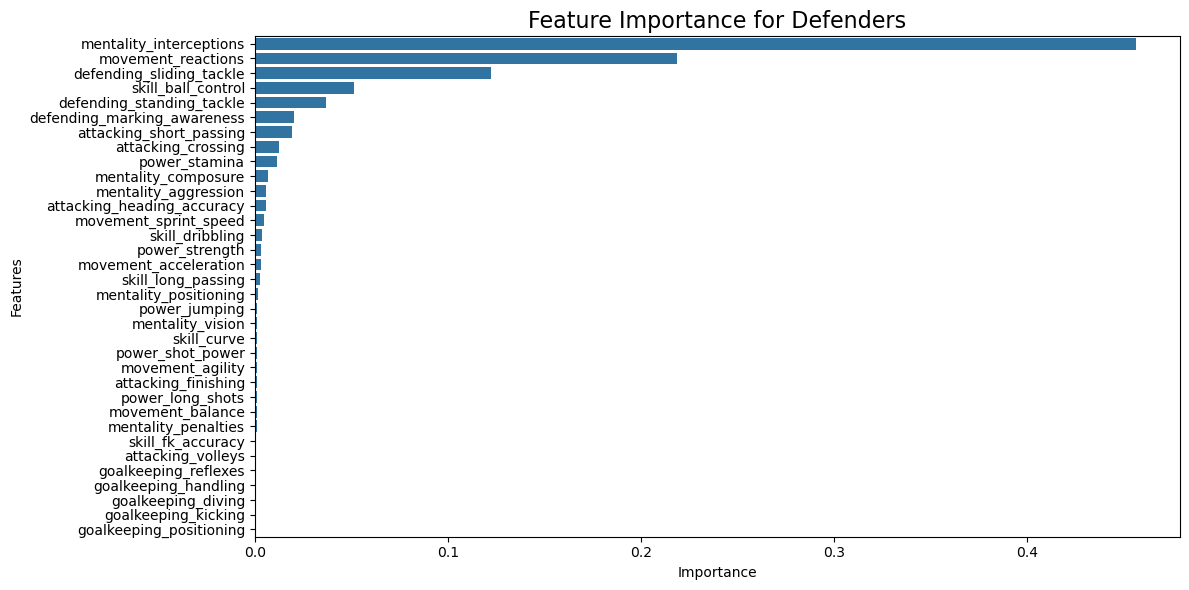

Mean Absolute Error for Defenders players: 0.79

Feature Importance for Goalkeepers:
                    feature  importance
29       goalkeeping_diving    0.402077
33     goalkeeping_reflexes    0.277360
32  goalkeeping_positioning    0.263457
30     goalkeeping_handling    0.033929
13       movement_reactions    0.012193
31      goalkeeping_kicking    0.000810
15         power_shot_power    0.000627
18           power_strength    0.000522
23         mentality_vision    0.000509
25      mentality_composure    0.000506


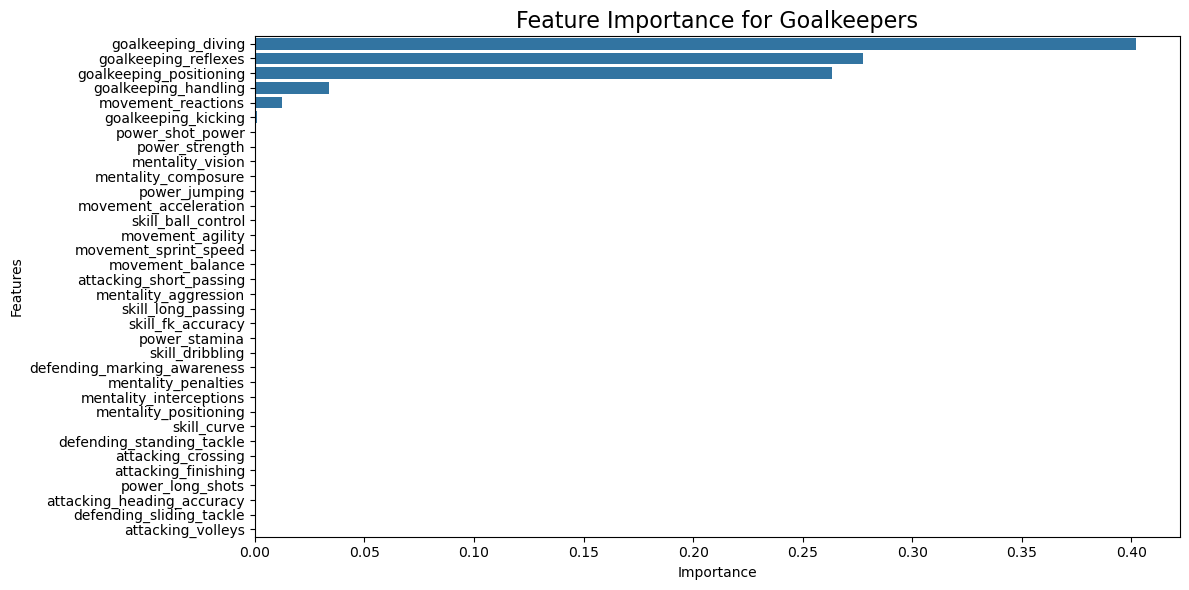

Mean Absolute Error for Goalkeepers players: 0.49



In [29]:
position_models = {}
position_scores = {}

for position, data in position_data.items():
    X = data[model_columns]
    y = data['overall']
    X = X.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    position_scores[position] = mae
    position_models[position] = rf_model

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print(f"Feature Importance for {position}:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance for {position}', fontsize=16)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

    print(f"Mean Absolute Error for {position} players: {mae:.2f}\n")

The analysis conducted using the Random Forest model for predicting player ratings based on position and other features provides valuable insights into the factors that most influence player performance. By evaluating the model's accuracy through Mean Absolute Error (MAE), the analysis helps to understand how well the model generalizes to unseen data across different player positions. The feature importance values are particularly significant, as they reveal which attributes—such as player statistics or specific game metrics—have the strongest correlation with overall ratings for each position. This understanding can guide coaches, analysts, and data scientists in identifying key performance indicators for players, ultimately helping to enhance team strategies and player assessments. The visualizations further clarify these relationships, making the results more accessible and actionable for those looking to improve team performance or scout talent more effectively.

Here we print the overall performance of the model

In [31]:
print("\nOverall Model Performance:")
print("----------------------------")
for position, score in position_scores.items():
    print(f"{position} players MAE: {score:.2f}")



Overall Model Performance:
----------------------------
Forwards players MAE: 0.87
Midfielders players MAE: 0.87
Defenders players MAE: 0.79
Goalkeepers players MAE: 0.49


Here I chose specific players to get a visual of the predictions

       short_name  overall  predicted_overall
4    K. De Bruyne       91              89.68
29     E. Haaland       88              87.40
49     M. Hummels       86              86.35
50     Jordi Alba       86              81.86
58      R. Mahrez       86              85.48
60       J. Vardy       86              86.23
204       G. Bale       82              80.87
223          Isco       82              80.57
259    C. Pulisic       82              81.82
389      G. Ochoa       80              79.92


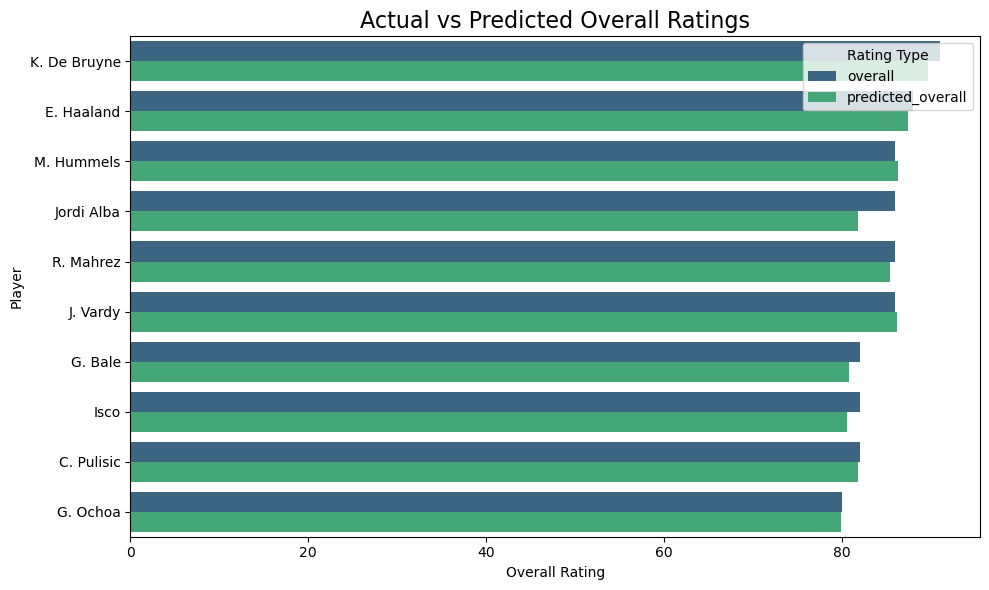

In [33]:
players_to_predict = ['K. De Bruyne', 'E. Haaland', 'J. Vardy', 'G. Bale', 'G. Ochoa', 
                      'Isco', 'C. Pulisic', 'M. Hummels', 'Jordi Alba', 'R. Mahrez']

player_data = fifa_data[fifa_data['short_name'].isin(players_to_predict)].copy()

predicted_overalls = []
for _, player in player_data.iterrows():
    player_position = player['player_positions'].split(',')[0]

    for group, positions in position_groups.items():
        if player_position in positions:
            model = position_models[group]
            break

    X_player = player[model_columns].astype(float).fillna(0).to_frame().T  # Convert to DataFrame and transpose
    predicted_overall = model.predict(X_player)[0]
    predicted_overalls.append(predicted_overall)

player_data.loc[:, 'predicted_overall'] = predicted_overalls
results = player_data[['short_name', 'overall', 'predicted_overall']].sort_values(by='overall', ascending=False)
print(results)

plt.figure(figsize=(10, 6))
sns.barplot(data=results.melt(id_vars='short_name', value_vars=['overall', 'predicted_overall']), 
            x='value', y='short_name', hue='variable', palette='viridis')
plt.title('Actual vs Predicted Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating')
plt.ylabel('Player')
plt.legend(title='Rating Type')
plt.tight_layout()
plt.show()

Predictive models, particularly Random Forests, are invaluable tools in analyzing complex datasets like FIFA player attributes. While linear regression provides quick predictions, it falls short when it comes to capturing intricate, non-linear relationships and interactions between features. This is especially true for FIFA player data, where player performance depends on a range of attributes that don’t follow simple linear patterns. Random Forest, however, excels at handling these complexities. It is capable of processing non-linearities, interactions, and high-dimensional data with greater accuracy, making it an ideal choice for predicting player ratings. By leveraging Random Forest, we can uncover detailed patterns that linear regression might miss, providing a deeper understanding of how specific attributes influence a player’s overall rating.

In our analysis, the Random Forest model demonstrated its strength by producing highly accurate predictions for FIFA player ratings. Notably, the model’s ability to evaluate Feature Importance highlighted key attributes that drive a player’s overall score, particularly for different position groups. For example, "Reactions" and "Ball Control" were identified as significant across all positions, while position-specific attributes, such as "Short Passing" for midfielders and "Interceptions" for defenders, showed clear correlations with their overall ratings. This suggests that FIFA’s rating system is grounded in well-defined, reproducible criteria, allowing for consistent and meaningful comparisons across players. Thus, Random Forest models not only improve predictive accuracy but also provide valuable insights into which attributes most strongly influence player performance.